## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9526313	total: 59ms	remaining: 58.9s
1:	learn: 0.9337172	total: 60.2ms	remaining: 30s
2:	learn: 0.9138455	total: 61.5ms	remaining: 20.4s
3:	learn: 0.8987958	total: 62.6ms	remaining: 15.6s
4:	learn: 0.8813934	total: 64.1ms	remaining: 12.8s
5:	learn: 0.8651930	total: 65.6ms	remaining: 10.9s
6:	learn: 0.8493811	total: 67.1ms	remaining: 9.51s
7:	learn: 0.8339683	total: 68.3ms	remaining: 8.46s
8:	learn: 0.8186697	total: 69.5ms	remaining: 7.65s
9:	learn: 0.8028712	total: 70.7ms	remaining: 7s
10:	learn: 0.7883851	total: 72ms	remaining: 6.47s
11:	learn: 0.7732157	total: 73.2ms	remaining: 6.03s
12:	learn: 0.7593217	total: 74.4ms	remaining: 5.65s
13:	learn: 0.7467142	total: 75.5ms	remaining: 5.32s
14:	learn: 0.7329722	total: 76.7ms	remaining: 5.03s
15:	learn: 0.7200674	total: 77.6ms	remaining: 4.77s
16:	learn: 0.7076082	total: 78.7ms	remaining: 4.55s
17:	learn: 0.6967038	total: 79.6ms	remaining: 4.34s
18:	learn: 0.6846367	total: 80.6ms	remaining: 4.16s
1

38:	learn: 0.5146284	total: 101ms	remaining: 2.49s
39:	learn: 0.5068071	total: 102ms	remaining: 2.45s
40:	learn: 0.5008803	total: 103ms	remaining: 2.41s
41:	learn: 0.4951413	total: 104ms	remaining: 2.37s
42:	learn: 0.4890240	total: 105ms	remaining: 2.34s
43:	learn: 0.4841829	total: 106ms	remaining: 2.3s
44:	learn: 0.4787656	total: 107ms	remaining: 2.27s
45:	learn: 0.4728343	total: 108ms	remaining: 2.24s
46:	learn: 0.4686900	total: 109ms	remaining: 2.21s
47:	learn: 0.4643345	total: 110ms	remaining: 2.17s
48:	learn: 0.4600170	total: 111ms	remaining: 2.15s
49:	learn: 0.4538054	total: 112ms	remaining: 2.13s
50:	learn: 0.4496963	total: 113ms	remaining: 2.11s
51:	learn: 0.4441525	total: 114ms	remaining: 2.08s
52:	learn: 0.4401884	total: 115ms	remaining: 2.06s
53:	learn: 0.4367614	total: 116ms	remaining: 2.04s
54:	learn: 0.4316256	total: 117ms	remaining: 2.01s
55:	learn: 0.4282698	total: 118ms	remaining: 1.99s
56:	learn: 0.4241701	total: 119ms	remaining: 1.97s
57:	learn: 0.4197776	total: 120m

120:	learn: 0.2833249	total: 191ms	remaining: 1.38s
121:	learn: 0.2824325	total: 192ms	remaining: 1.38s
122:	learn: 0.2811939	total: 193ms	remaining: 1.38s
123:	learn: 0.2802850	total: 195ms	remaining: 1.38s
124:	learn: 0.2790962	total: 196ms	remaining: 1.37s
125:	learn: 0.2779053	total: 197ms	remaining: 1.37s
126:	learn: 0.2765137	total: 198ms	remaining: 1.36s
127:	learn: 0.2759472	total: 199ms	remaining: 1.36s
128:	learn: 0.2744047	total: 200ms	remaining: 1.35s
129:	learn: 0.2736513	total: 201ms	remaining: 1.35s
130:	learn: 0.2724739	total: 203ms	remaining: 1.34s
131:	learn: 0.2715220	total: 204ms	remaining: 1.34s
132:	learn: 0.2706963	total: 205ms	remaining: 1.34s
133:	learn: 0.2692509	total: 206ms	remaining: 1.33s
134:	learn: 0.2682542	total: 208ms	remaining: 1.33s
135:	learn: 0.2671273	total: 209ms	remaining: 1.33s
136:	learn: 0.2665303	total: 211ms	remaining: 1.33s
137:	learn: 0.2653699	total: 213ms	remaining: 1.33s
138:	learn: 0.2639661	total: 214ms	remaining: 1.32s
139:	learn: 

209:	learn: 0.2153632	total: 289ms	remaining: 1.09s
210:	learn: 0.2148429	total: 290ms	remaining: 1.08s
211:	learn: 0.2141031	total: 291ms	remaining: 1.08s
212:	learn: 0.2139834	total: 292ms	remaining: 1.08s
213:	learn: 0.2134245	total: 293ms	remaining: 1.08s
214:	learn: 0.2129957	total: 294ms	remaining: 1.07s
215:	learn: 0.2126417	total: 295ms	remaining: 1.07s
216:	learn: 0.2120378	total: 296ms	remaining: 1.07s
217:	learn: 0.2115567	total: 297ms	remaining: 1.06s
218:	learn: 0.2110864	total: 298ms	remaining: 1.06s
219:	learn: 0.2107355	total: 300ms	remaining: 1.06s
220:	learn: 0.2099607	total: 301ms	remaining: 1.06s
221:	learn: 0.2094613	total: 302ms	remaining: 1.06s
222:	learn: 0.2089868	total: 303ms	remaining: 1.05s
223:	learn: 0.2084122	total: 304ms	remaining: 1.05s
224:	learn: 0.2077836	total: 305ms	remaining: 1.05s
225:	learn: 0.2072775	total: 306ms	remaining: 1.05s
226:	learn: 0.2067726	total: 307ms	remaining: 1.05s
227:	learn: 0.2065241	total: 308ms	remaining: 1.04s
228:	learn: 

299:	learn: 0.1750275	total: 379ms	remaining: 884ms
300:	learn: 0.1746121	total: 380ms	remaining: 883ms
301:	learn: 0.1743042	total: 381ms	remaining: 881ms
302:	learn: 0.1738387	total: 382ms	remaining: 878ms
303:	learn: 0.1733568	total: 383ms	remaining: 876ms
304:	learn: 0.1731907	total: 384ms	remaining: 874ms
305:	learn: 0.1728582	total: 384ms	remaining: 872ms
306:	learn: 0.1724402	total: 385ms	remaining: 870ms
307:	learn: 0.1720352	total: 386ms	remaining: 868ms
308:	learn: 0.1718860	total: 387ms	remaining: 866ms
309:	learn: 0.1714428	total: 388ms	remaining: 864ms
310:	learn: 0.1711439	total: 389ms	remaining: 862ms
311:	learn: 0.1710777	total: 390ms	remaining: 859ms
312:	learn: 0.1706373	total: 391ms	remaining: 857ms
313:	learn: 0.1702279	total: 392ms	remaining: 855ms
314:	learn: 0.1699115	total: 392ms	remaining: 853ms
315:	learn: 0.1697881	total: 393ms	remaining: 851ms
316:	learn: 0.1696470	total: 394ms	remaining: 849ms
317:	learn: 0.1692550	total: 395ms	remaining: 847ms
318:	learn: 

407:	learn: 0.1418670	total: 479ms	remaining: 696ms
408:	learn: 0.1417249	total: 481ms	remaining: 694ms
409:	learn: 0.1413233	total: 481ms	remaining: 693ms
410:	learn: 0.1411566	total: 483ms	remaining: 692ms
411:	learn: 0.1407112	total: 484ms	remaining: 691ms
412:	learn: 0.1403714	total: 485ms	remaining: 689ms
413:	learn: 0.1401283	total: 486ms	remaining: 688ms
414:	learn: 0.1398507	total: 487ms	remaining: 686ms
415:	learn: 0.1396221	total: 488ms	remaining: 685ms
416:	learn: 0.1394342	total: 489ms	remaining: 684ms
417:	learn: 0.1390949	total: 490ms	remaining: 682ms
418:	learn: 0.1387647	total: 491ms	remaining: 681ms
419:	learn: 0.1385799	total: 492ms	remaining: 680ms
420:	learn: 0.1384155	total: 494ms	remaining: 679ms
421:	learn: 0.1380692	total: 495ms	remaining: 678ms
422:	learn: 0.1377962	total: 496ms	remaining: 676ms
423:	learn: 0.1376288	total: 497ms	remaining: 675ms
424:	learn: 0.1373847	total: 498ms	remaining: 673ms
425:	learn: 0.1373536	total: 499ms	remaining: 672ms
426:	learn: 

490:	learn: 0.1238176	total: 569ms	remaining: 590ms
491:	learn: 0.1236355	total: 570ms	remaining: 589ms
492:	learn: 0.1235598	total: 571ms	remaining: 587ms
493:	learn: 0.1233885	total: 573ms	remaining: 587ms
494:	learn: 0.1231174	total: 574ms	remaining: 586ms
495:	learn: 0.1228737	total: 575ms	remaining: 584ms
496:	learn: 0.1227526	total: 576ms	remaining: 583ms
497:	learn: 0.1224084	total: 577ms	remaining: 582ms
498:	learn: 0.1222098	total: 578ms	remaining: 580ms
499:	learn: 0.1219316	total: 579ms	remaining: 579ms
500:	learn: 0.1215558	total: 580ms	remaining: 577ms
501:	learn: 0.1213163	total: 581ms	remaining: 576ms
502:	learn: 0.1210412	total: 582ms	remaining: 575ms
503:	learn: 0.1207839	total: 583ms	remaining: 574ms
504:	learn: 0.1204338	total: 586ms	remaining: 574ms
505:	learn: 0.1201963	total: 587ms	remaining: 573ms
506:	learn: 0.1200299	total: 588ms	remaining: 571ms
507:	learn: 0.1200132	total: 588ms	remaining: 570ms
508:	learn: 0.1199357	total: 590ms	remaining: 569ms
509:	learn: 

582:	learn: 0.1065430	total: 669ms	remaining: 479ms
583:	learn: 0.1065139	total: 670ms	remaining: 478ms
584:	learn: 0.1064993	total: 672ms	remaining: 477ms
585:	learn: 0.1062916	total: 673ms	remaining: 476ms
586:	learn: 0.1062762	total: 674ms	remaining: 475ms
587:	learn: 0.1061563	total: 675ms	remaining: 473ms
588:	learn: 0.1060209	total: 677ms	remaining: 472ms
589:	learn: 0.1058988	total: 679ms	remaining: 472ms
590:	learn: 0.1058670	total: 680ms	remaining: 471ms
591:	learn: 0.1057699	total: 682ms	remaining: 470ms
592:	learn: 0.1057563	total: 683ms	remaining: 469ms
593:	learn: 0.1057187	total: 704ms	remaining: 481ms
594:	learn: 0.1056524	total: 715ms	remaining: 487ms
595:	learn: 0.1053552	total: 716ms	remaining: 485ms
596:	learn: 0.1052014	total: 717ms	remaining: 484ms
597:	learn: 0.1049165	total: 718ms	remaining: 483ms
598:	learn: 0.1048985	total: 719ms	remaining: 481ms
599:	learn: 0.1047119	total: 721ms	remaining: 481ms
600:	learn: 0.1046403	total: 722ms	remaining: 479ms
601:	learn: 

641:	learn: 0.0979746	total: 761ms	remaining: 425ms
642:	learn: 0.0978226	total: 763ms	remaining: 423ms
643:	learn: 0.0978120	total: 763ms	remaining: 422ms
644:	learn: 0.0975799	total: 764ms	remaining: 421ms
645:	learn: 0.0973954	total: 765ms	remaining: 419ms
646:	learn: 0.0973724	total: 766ms	remaining: 418ms
647:	learn: 0.0972813	total: 767ms	remaining: 417ms
648:	learn: 0.0971816	total: 769ms	remaining: 416ms
649:	learn: 0.0970741	total: 770ms	remaining: 414ms
650:	learn: 0.0968269	total: 771ms	remaining: 413ms
651:	learn: 0.0966966	total: 772ms	remaining: 412ms
652:	learn: 0.0966718	total: 773ms	remaining: 411ms
653:	learn: 0.0966473	total: 774ms	remaining: 409ms
654:	learn: 0.0964186	total: 775ms	remaining: 408ms
655:	learn: 0.0963768	total: 776ms	remaining: 407ms
656:	learn: 0.0961724	total: 777ms	remaining: 406ms
657:	learn: 0.0960136	total: 778ms	remaining: 404ms
658:	learn: 0.0959225	total: 779ms	remaining: 403ms
659:	learn: 0.0957394	total: 780ms	remaining: 402ms
660:	learn: 

746:	learn: 0.0866974	total: 862ms	remaining: 292ms
747:	learn: 0.0864788	total: 863ms	remaining: 291ms
748:	learn: 0.0864436	total: 864ms	remaining: 290ms
749:	learn: 0.0862980	total: 865ms	remaining: 288ms
750:	learn: 0.0861722	total: 866ms	remaining: 287ms
751:	learn: 0.0860175	total: 867ms	remaining: 286ms
752:	learn: 0.0858361	total: 868ms	remaining: 285ms
753:	learn: 0.0856415	total: 869ms	remaining: 283ms
754:	learn: 0.0854630	total: 870ms	remaining: 282ms
755:	learn: 0.0853867	total: 870ms	remaining: 281ms
756:	learn: 0.0853079	total: 871ms	remaining: 280ms
757:	learn: 0.0851767	total: 872ms	remaining: 278ms
758:	learn: 0.0850981	total: 873ms	remaining: 277ms
759:	learn: 0.0848705	total: 874ms	remaining: 276ms
760:	learn: 0.0846821	total: 875ms	remaining: 275ms
761:	learn: 0.0845827	total: 876ms	remaining: 274ms
762:	learn: 0.0845422	total: 877ms	remaining: 272ms
763:	learn: 0.0843968	total: 878ms	remaining: 271ms
764:	learn: 0.0843469	total: 879ms	remaining: 270ms
765:	learn: 

844:	learn: 0.0753388	total: 953ms	remaining: 175ms
845:	learn: 0.0752392	total: 954ms	remaining: 174ms
846:	learn: 0.0751173	total: 955ms	remaining: 172ms
847:	learn: 0.0750444	total: 956ms	remaining: 171ms
848:	learn: 0.0749797	total: 957ms	remaining: 170ms
849:	learn: 0.0747805	total: 958ms	remaining: 169ms
850:	learn: 0.0746971	total: 958ms	remaining: 168ms
851:	learn: 0.0744799	total: 959ms	remaining: 167ms
852:	learn: 0.0743698	total: 960ms	remaining: 165ms
853:	learn: 0.0742771	total: 961ms	remaining: 164ms
854:	learn: 0.0742626	total: 962ms	remaining: 163ms
855:	learn: 0.0741200	total: 963ms	remaining: 162ms
856:	learn: 0.0739456	total: 964ms	remaining: 161ms
857:	learn: 0.0738750	total: 965ms	remaining: 160ms
858:	learn: 0.0738270	total: 965ms	remaining: 158ms
859:	learn: 0.0737571	total: 966ms	remaining: 157ms
860:	learn: 0.0737314	total: 968ms	remaining: 156ms
861:	learn: 0.0736226	total: 969ms	remaining: 155ms
862:	learn: 0.0735589	total: 970ms	remaining: 154ms
863:	learn: 

953:	learn: 0.0653553	total: 1.05s	remaining: 50.8ms
954:	learn: 0.0653126	total: 1.05s	remaining: 49.7ms
955:	learn: 0.0653086	total: 1.06s	remaining: 48.6ms
956:	learn: 0.0652135	total: 1.06s	remaining: 47.5ms
957:	learn: 0.0651306	total: 1.06s	remaining: 46.4ms
958:	learn: 0.0651070	total: 1.06s	remaining: 45.3ms
959:	learn: 0.0651013	total: 1.06s	remaining: 44.2ms
960:	learn: 0.0649849	total: 1.06s	remaining: 43.1ms
961:	learn: 0.0648072	total: 1.06s	remaining: 42ms
962:	learn: 0.0646864	total: 1.06s	remaining: 40.8ms
963:	learn: 0.0645694	total: 1.06s	remaining: 39.7ms
964:	learn: 0.0645077	total: 1.06s	remaining: 38.6ms
965:	learn: 0.0644474	total: 1.06s	remaining: 37.5ms
966:	learn: 0.0643267	total: 1.07s	remaining: 36.4ms
967:	learn: 0.0642780	total: 1.07s	remaining: 35.3ms
968:	learn: 0.0641711	total: 1.07s	remaining: 34.2ms
969:	learn: 0.0640725	total: 1.07s	remaining: 33.1ms
970:	learn: 0.0639299	total: 1.07s	remaining: 32ms
971:	learn: 0.0638416	total: 1.07s	remaining: 30.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

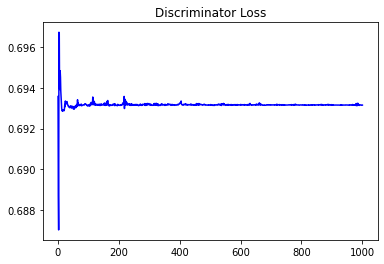

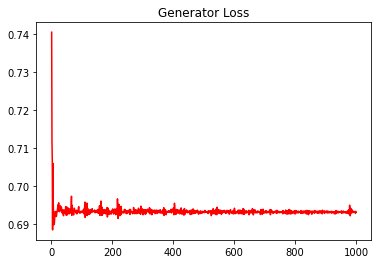

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13418376939100526


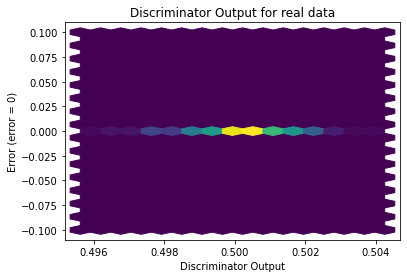

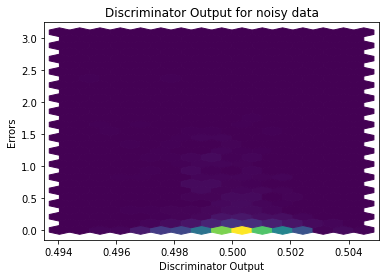

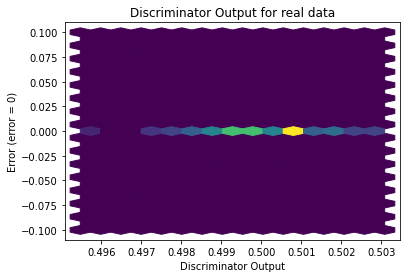

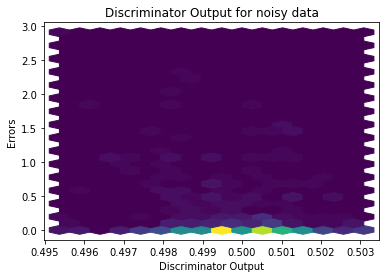

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


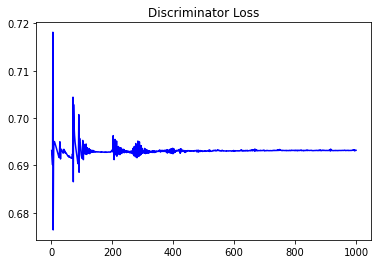

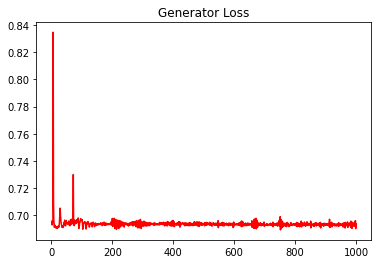

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.11475667233742887


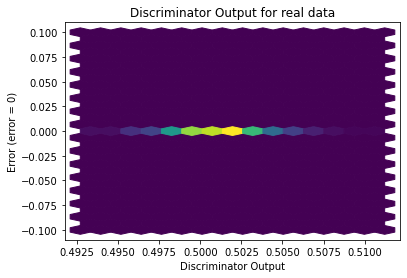

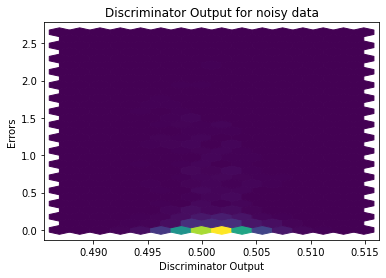

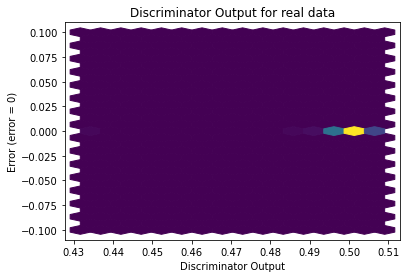

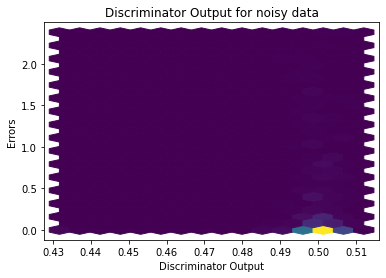

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0790]], requires_grad=True)
